# **HEY README, THIS IS OPENING!**

In this section, I will conduct a simple Exploratory Data Analysis on three datasets: **KRL passenger data from 2006 to 2023, unemployment and employment data from 2011 to 2023, and inflation data from 2002 to 2023**. I will analyze each dataset individually as well as their combinations.

These three datasets are merged using the *inner join* method based on the common year. The focus here will be on statistical calculations and minimal visualization. For comprehensive visualization, please refer to Tableau:
https://public.tableau.com/views/ProjekKereta/HomeLightMode?:language=en-US&:display_count=n&:origin=viz_share_link

I have limited the discussion to descriptive statistics, mean significance tests, and variable correlation tests. For predictive prescriptive statistics using machine learning, I will perform them in another project :) Ah, not to forget, the language in this notebook is english but i still use Indonesian for visualization and column names!

Our main goal is to know the correlation between inflation, KRL passengers, and employment+unemployment in Indonesia, but we'll explore little more than that as well.

Okey, let's get started! But, first of all, let's import the data and library!

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, f_oneway
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read the datas
df_1 = pd.read_excel('/kaggle/input/indonesiaemployment/Data Penduduk Bekerja dan Pengangguran.xlsx')
df_2 = pd.read_excel('/kaggle/input/indonesian-commuter-dataset-from-2006-2023/Dataset KRL 2006-2023.xlsx')
df_3 = pd.read_excel('/kaggle/input/inflation-in-indonesia-per-month-from-2003-2023/Inflasi Dari BI.xlsx')

"Alright, let's take a look at our data!"

In [3]:
df_1

,Tanggal,Jumlah Penduduk Bekerja,Jumlah Pengangguran
0,2011-02-01,11204588,837988
1,2011-08-01,10741631,868139
2,2012-02-01,11406198,775783
3,2012-08-01,11250487,734487
4,2013-02-01,11592961,724090
5,2013-08-01,11276107,741093
6,2014-02-01,11816992,714707
7,2014-08-01,11462803,724491
8,2015-02-01,12084682,745477
9,2015-08-01,11481920,756082


In [4]:
df_2

,Wilayah,Tanggal,Jumlah,Longitude,Latitude
0,Jabodetabek,2006-01-01,8681,106.8178,-6.2175
1,Jabodetabek,2006-02-01,8144,106.8178,-6.2175
2,Jabodetabek,2006-03-01,8920,106.8178,-6.2175
3,Jabodetabek,2006-04-01,8462,106.8178,-6.2175
4,Jabodetabek,2006-05-01,8899,106.8178,-6.2175
...,...,...,...,...,...
827,Jawa (Jabodetabek+Non Jabodetabek),2023-04-01,27731,110.7122,-7.6145
828,Sumatera,2023-01-01,582,101.3431,-0.5897
829,Sumatera,2023-02-01,515,101.3431,-0.5897
830,Sumatera,2023-03-01,571,101.3431,-0.5897


In [5]:
df_3

,No,Tanggal,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15
...,...,...,...
240,241,2023-01-01,5.28
241,242,2023-02-01,5.47
242,243,2023-03-01,4.97
243,244,2023-04-01,4.33


# **Data Cleaning**

In [6]:
# Checking for missing values
df_1.isnull().sum()


Tanggal                    0
Jumlah Penduduk Bekerja    0
Jumlah Pengangguran        0
dtype: int64

In [7]:
df_2.isnull().sum()

Wilayah      0
Tanggal      0
Jumlah       0
Longitude    0
Latitude     0
dtype: int64

In [8]:
df_3.isnull().sum()

No                             0
Tanggal                        0
Data Inflasi (dalam persen)    0
dtype: int64

In [9]:
# Checking the data types
df_1.dtypes

Tanggal                    datetime64[ns]
Jumlah Penduduk Bekerja             int64
Jumlah Pengangguran                 int64
dtype: object

In [10]:
df_2.dtypes

Wilayah              object
Tanggal      datetime64[ns]
Jumlah                int64
Longitude           float64
Latitude            float64
dtype: object

In [11]:
df_3.dtypes

No                                      int64
Tanggal                        datetime64[ns]
Data Inflasi (dalam persen)           float64
dtype: object

Based on the above results, it appears that **there are no missing values in the dataset**, and **the data formats are correct**. Numeric data is in the form of numbers, and dates are in the datetime format. Next, we will change each 'Month' column to 'Year' because we will analyze each data per year.



In [12]:
# Changing the column name 'Tanggal' to 'Tahun' for each dataframe
for i in range(1, 4):
    globals()[f"df_{i}"].rename(columns={'Tanggal': 'Tahun'}, inplace=True)


In [13]:
#Let's read the data again
df_1.head(5)

,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran
0,2011-02-01,11204588,837988
1,2011-08-01,10741631,868139
2,2012-02-01,11406198,775783
3,2012-08-01,11250487,734487
4,2013-02-01,11592961,724090


In [14]:
df_2.head(5)

,Wilayah,Tahun,Jumlah,Longitude,Latitude
0,Jabodetabek,2006-01-01,8681,106.8178,-6.2175
1,Jabodetabek,2006-02-01,8144,106.8178,-6.2175
2,Jabodetabek,2006-03-01,8920,106.8178,-6.2175
3,Jabodetabek,2006-04-01,8462,106.8178,-6.2175
4,Jabodetabek,2006-05-01,8899,106.8178,-6.2175


In [15]:
df_3.head(5)

,No,Tahun,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15


Note: Although the content of the 'Tahun' column in each dataset contains complete dates (not just the year), for now, let's keep it as the year only.

# **Descriptive Statistics**

1. Population and Unemployment Data. For easier analysis, let's first group the data by year.

In [16]:
# Changing the 'Tahun' column to datetime type
df_1['Tahun'] = pd.to_datetime(df_1['Tahun'])

# Grouping the data by year
df_1_new = df_1.groupby(df_1['Tahun'].dt.year).sum().reset_index()
df_1_new


,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran
0,2011,21946219,1706127
1,2012,22656685,1510270
2,2013,22869068,1465183
3,2014,23279795,1439198
4,2015,23566602,1501559
5,2016,23905967,1405595
6,2017,24556127,1404558
7,2018,25576173,1403685
8,2019,26044786,1400322
9,2020,26174705,1669324


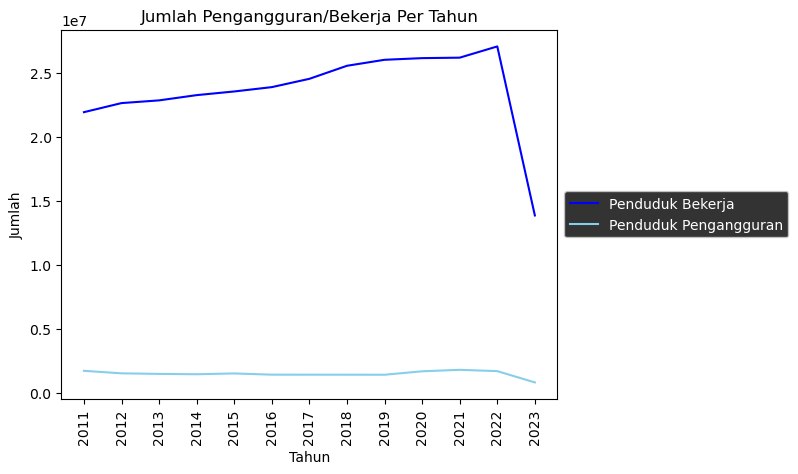

In [17]:
# Creating a visualization of the data trend
plt.plot(df_1_new['Tahun'], df_1_new['Jumlah Penduduk Bekerja'], color='blue', label='Penduduk Bekerja')
plt.plot(df_1_new['Tahun'], df_1_new['Jumlah Pengangguran'], color='skyblue', label='Penduduk Pengangguran')
plt.title('Jumlah Pengangguran/Bekerja Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(False)
plt.style.use('dark_background')
plt.xticks(df_1_new['Tahun'], rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


From the data, it can be observed that the trend of the **working population is generally increasing** except starting from 2020, where it shows a decline, while the trend for the **unemployed population is relatively stagnant**. The data also indicates a drastic difference in the number of people who are employed and unemployed. Next, let's move on to the summary statistics of the data.

In [18]:
df_1_new.describe()

,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran
count,13.00000,1.300000e+01,1.300000e+01
mean,2017.00000,2.367244e+07,1.474797e+06
std,3.89444,3.360604e+06,2.434453e+05
min,2011.00000,1.386325e+07,7.989280e+05
25%,2014.00000,2.286907e+07,1.404558e+06
50%,2017.00000,2.390597e+07,1.465183e+06
75%,2020.00000,2.604479e+07,1.669324e+06
max,2023.00000,2.709086e+07,1.784806e+06


From the above data, it can be observed that the average number of employed individuals per year is **around 23 million**, while the average number of unemployed individuals is **around 1.5 million**. There is a significant difference between these two figures. However, is this difference statistically significant? We will find out later! Stay tuned for more insights in this section!.

Additionally, from the data, it can be seen that the standard deviation of the number of employed individuals is **approximately 3.3 million, which is about 1/7 of its mean**. This indicates that the average difference between the data points and the overall mean is around 3.3 million. On the other hand, for the unemployed population, the standard deviation **is around 240,000, implying that the data deviates by approximately 240,000 from its mean value**, which is about 1.5 million, each year.

2. Commuters Users Data In Indonesia by Region
To simplify the analysis, we will group the data based on regions and overall years.

In [19]:
# Getting the unqiue region of the data
A = df_2['Wilayah'].unique()
A

array(['Jabodetabek', 'Non Jabodetabek (Jawa)',
       'Jawa (Jabodetabek+Non Jabodetabek)', 'Sumatera'], dtype=object)

In [20]:
# Create a copy of df_2 where 'Wilayah' is 'Jabodetabek'
df_2_1 = df_2[df_2['Wilayah'] == 'Jabodetabek'].copy()

# Create a copy of df_2 where 'Wilayah' is 'Non Jabodetabek (Jawa)'
df_2_2 = df_2[df_2['Wilayah'] == 'Non Jabodetabek (Jawa)'].copy()

# Create a copy of df_2 where 'Wilayah' is 'Jawa (Jabodetabek+Non Jabodetabek)'
df_2_3 = df_2[df_2['Wilayah'] == 'Jawa (Jabodetabek+Non Jabodetabek)'].copy()

# Create a copy of df_2 where 'Wilayah' is 'Sumatera'
df_2_4 = df_2[df_2['Wilayah'] == 'Sumatera'].copy()

# Convert the 'Tahun' column in df_2_1 to datetime format
df_2_1.loc[:, 'Tahun'] = pd.to_datetime(df_2_1['Tahun'])

# Convert the 'Tahun' column in df_2_2 to datetime format
df_2_2.loc[:, 'Tahun'] = pd.to_datetime(df_2_2['Tahun'])

# Convert the 'Tahun' column in df_2_3 to datetime format
df_2_3.loc[:, 'Tahun'] = pd.to_datetime(df_2_3['Tahun'])

# Convert the 'Tahun' column in df_2_4 to datetime format
df_2_4.loc[:, 'Tahun'] = pd.to_datetime(df_2_4['Tahun'])

# Group the rows in df_2_1 by the year extracted from 'Tahun',
# sum the 'Jumlah' column for each year, and reset the index
df_2_1 = df_2_1.groupby(df_2_1['Tahun'].dt.year)['Jumlah'].sum().reset_index()

# Add a new 'Wilayah' column to df_2_1 containing the value 'Jabodetabek' for each row
df_2_1['Wilayah'] = ['Jabodetabek'] * len(df_2_1)

# Group the rows in df_2_2 by the year extracted from 'Tahun',
# sum the 'Jumlah' column for each year, and reset the index
df_2_2 = df_2_2.groupby(df_2_2['Tahun'].dt.year)['Jumlah'].sum().reset_index()

# Add a new 'Wilayah' column to df_2_2 containing the value 'Non Jabodetabek (Jawa)' for each row
df_2_2['Wilayah'] = ['Non Jabodetabek (Jawa)'] * len(df_2_2)

# Group the rows in df_2_3 by the year extracted from 'Tahun',
# sum the 'Jumlah' column for each year, and reset the index
df_2_3 = df_2_3.groupby(df_2_3['Tahun'].dt.year)['Jumlah'].sum().reset_index()

# Add a new 'Wilayah' column to df_2_3 containing the value 'Jawa (Jabodetabek+Non Jabodetabek)' for each row
df_2_3['Wilayah'] = ['Jawa (Jabodetabek+Non Jabodetabek)'] * len(df_2_3)

# Group the rows in df_2_4 by the year extracted from 'Tahun',
# sum the 'Jumlah' column for each year, and reset the index
df_2_4 = df_2_4.groupby(df_2_4['Tahun'].dt.year)['Jumlah'].sum().reset_index()

# Add a new 'Wilayah' column to df_2_4 containing the value 'Sumatera' for each row
df_2_4['Wilayah'] = ['Sumatera'] * len(df_2_4)


In [21]:
#Let's read the data again
df_2_1

,Tahun,Jumlah,Wilayah
0,2006,104425,Jabodetabek
1,2007,118095,Jabodetabek
2,2008,125451,Jabodetabek
3,2009,130508,Jabodetabek
4,2010,124308,Jabodetabek
5,2011,121105,Jabodetabek
6,2012,134088,Jabodetabek
7,2013,158483,Jabodetabek
8,2014,208496,Jabodetabek
9,2015,257531,Jabodetabek


In [22]:
df_2_2

,Tahun,Jumlah,Wilayah
0,2006,51671,Non Jabodetabek (Jawa)
1,2007,53826,Non Jabodetabek (Jawa)
2,2008,64688,Non Jabodetabek (Jawa)
3,2009,68913,Non Jabodetabek (Jawa)
4,2010,73720,Non Jabodetabek (Jawa)
5,2011,72936,Non Jabodetabek (Jawa)
6,2012,63707,Non Jabodetabek (Jawa)
7,2013,53532,Non Jabodetabek (Jawa)
8,2014,64108,Non Jabodetabek (Jawa)
9,2015,63090,Non Jabodetabek (Jawa)


In [23]:
df_2_3

,Tahun,Jumlah,Wilayah
0,2006,156096,Jawa (Jabodetabek+Non Jabodetabek)
1,2007,171921,Jawa (Jabodetabek+Non Jabodetabek)
2,2008,190138,Jawa (Jabodetabek+Non Jabodetabek)
3,2009,199422,Jawa (Jabodetabek+Non Jabodetabek)
4,2010,198028,Jawa (Jabodetabek+Non Jabodetabek)
5,2011,194041,Jawa (Jabodetabek+Non Jabodetabek)
6,2012,197795,Jawa (Jabodetabek+Non Jabodetabek)
7,2013,212015,Jawa (Jabodetabek+Non Jabodetabek)
8,2014,272604,Jawa (Jabodetabek+Non Jabodetabek)
9,2015,320621,Jawa (Jabodetabek+Non Jabodetabek)


In [24]:
df_2_4

,Tahun,Jumlah,Wilayah
0,2006,3323,Sumatera
1,2007,3415,Sumatera
2,2008,3939,Sumatera
3,2009,4119,Sumatera
4,2010,5241,Sumatera
5,2011,5296,Sumatera
6,2012,4384,Sumatera
7,2013,3995,Sumatera
8,2014,4904,Sumatera
9,2015,5324,Sumatera


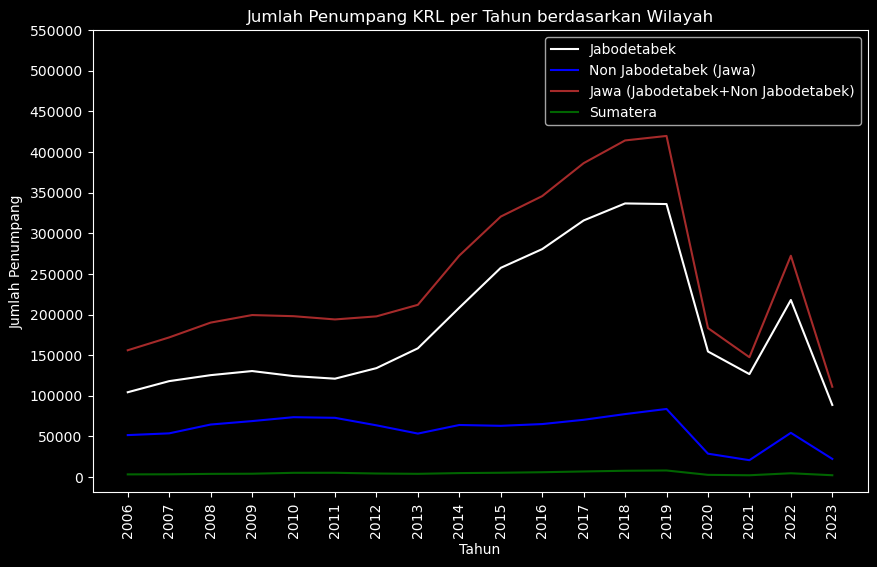

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data for Jabodetabek
plt.plot(df_2_1['Tahun'], df_2_1['Jumlah'], label='Jabodetabek', color='white')

# Plot the data for Non Jabodetabek (Jawa)
plt.plot(df_2_2['Tahun'], df_2_2['Jumlah'], label='Non Jabodetabek (Jawa)', color='blue')

# Plot the data for Jawa (Jabodetabek+Non Jabodetabek)
plt.plot(df_2_3['Tahun'], df_2_3['Jumlah'], label='Jawa (Jabodetabek+Non Jabodetabek)', color='brown')

# Plot the data for Sumatera
plt.plot(df_2_4['Tahun'], df_2_4['Jumlah'], label='Sumatera', color='darkgreen')

# Set the title and axis labels
plt.title('Jumlah Penumpang KRL per Tahun berdasarkan Wilayah')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang')

# Set the plot style to dark background
plt.style.use('dark_background')

# Set the x-axis tick labels and rotation
plt.xticks(df_2_1['Tahun'], rotation=90)

# Set the y-axis tick range
plt.yticks(np.arange(0, 600000, 50000))

# Display the legend
plt.legend()

# Turn off the grid
plt.grid(False)

# Display the plot
plt.show()


From the data, it can be seen that **the total number of passengers for the Greater Jakarta area (Jabodetabek) and Java (Jabodetabek+Non Jabodetabek) tends to increase from year to year, while for Non Jabodetabek areas in Java and Sumatra, it remains stable over time.** However, is that really the case, or is it just a visual illusion? Let's check it together in the discussion that follows.

The data also reveals a significant difference between KRL (Commuter Train) users in the Jabodetabek area compared to other regions. Now, let's take a look at the descriptive statistical summary for each region.

In [26]:
#Statistical summary of Jabodetabek
df_2_1.describe()


,Tahun,Jumlah
count,18.000000,18.000000
mean,2014.500000,185547.722222
std,5.338539,84412.525759
min,2006.000000,88786.000000
25%,2010.250000,124593.750000
50%,2014.500000,144339.500000
75%,2018.750000,247639.500000
max,2023.000000,336799.000000


In [27]:
df_2_2.describe()

,Tahun,Jumlah
count,18.000000,18.000000
mean,2014.500000,58541.111111
std,5.338539,18116.988196
min,2006.000000,20781.000000
25%,2010.250000,53605.500000
50%,2014.500000,63907.500000
75%,2018.750000,70109.250000
max,2023.000000,83833.000000


In [28]:
df_2_3.describe()

,Tahun,Jumlah
count,18.000000,18.000000
mean,2014.500000,244088.666667
std,5.338539,95267.735767
min,2006.000000,111159.000000
25%,2010.250000,185079.250000
50%,2014.500000,198725.000000
75%,2018.750000,308616.750000
max,2023.000000,419878.000000


In [29]:
df_2_4.describe()

,Tahun,Jumlah
count,18.000000,18.000000
mean,2014.500000,4704.000000
std,5.338539,1711.074929
min,2006.000000,2242.000000
25%,2010.250000,3546.000000
50%,2014.500000,4540.000000
75%,2018.750000,5317.000000
max,2023.000000,8128.000000


From the four sets of data, as seen in the visualization, there is indeed a significant surge in the **Jabodetabek and Java (Jabodetabek+Non Jabodetabek)** areas, with the minimum number of passengers being around 88,786 and 111,159, while the maximum number is 336,799 and 419,878, nearly four times the minimum count.

For Java (Non Jabodetabek), the trend is **increasing**, but not as significantly as the previous two areas, with the minimum and maximum passengers being 20,781 and 83,833, respectively. As for Sumatra, it is quite surprising because in the previous visualization, it appeared to have minimal growth and remained stable. However, the actual **maximum and minimum passengers are 2,242 and 8,128**, which is almost a four-fold increase. So, let's take a closer look at the visualization to avoid being deceived by the difference in scale, focusing on the Jabodetabek area with Java (Jabodetabek+Non Jabodetabek) and Sumatra with Java (Non Jabodetabek).

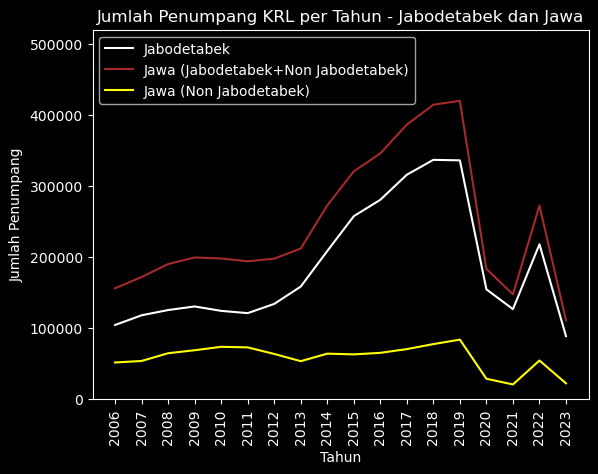

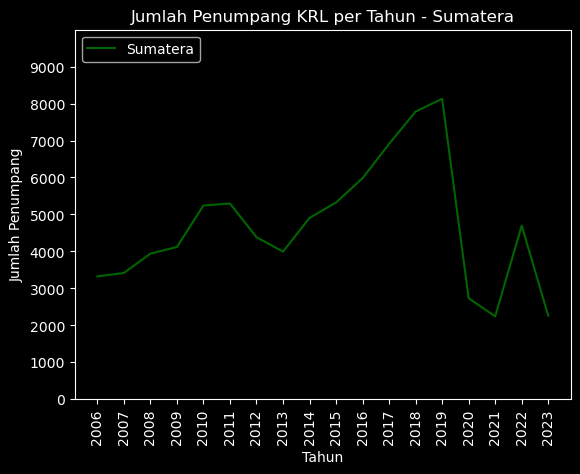

In [30]:
# Creating top data visualization
plt.plot(df_2_1['Tahun'], df_2_1['Jumlah'], label='Jabodetabek', color='white')
plt.plot(df_2_3['Tahun'], df_2_3['Jumlah'], label='Jawa (Jabodetabek+Non Jabodetabek)', color='brown')
plt.plot(df_2_2['Tahun'], df_2_2['Jumlah'], label='Jawa (Non Jabodetabek)', color='yellow')
plt.title('Jumlah Penumpang KRL per Tahun - Jabodetabek dan Jawa')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang')
plt.xticks(df_2_1['Tahun'], rotation=90)
plt.yticks(np.arange(0, 600000, 100000))
plt.legend(loc='upper left')
plt.ylim(0, 520000)
plt.grid(False)
plt.show()

# Creating bottom data visualization
plt.plot(df_2_4['Tahun'], df_2_4['Jumlah'], label='Sumatera', color='darkgreen')
plt.title('Jumlah Penumpang KRL per Tahun - Sumatera')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang')
plt.xticks(df_2_1['Tahun'], rotation=90)
plt.yticks(np.arange(0, 10000, 1000))
plt.legend(loc='upper left')
plt.ylim(0, 10000)
plt.grid(False)

# Displaying the plots
plt.show()


Does the visual above appear more representative? Next, we will try to use the combined data from those regions, namely the KRL (Commuter Train) passengers in Indonesia as a whole.

In [31]:
# Let's take a look at our data again
df_2

,Wilayah,Tahun,Jumlah,Longitude,Latitude
0,Jabodetabek,2006-01-01,8681,106.8178,-6.2175
1,Jabodetabek,2006-02-01,8144,106.8178,-6.2175
2,Jabodetabek,2006-03-01,8920,106.8178,-6.2175
3,Jabodetabek,2006-04-01,8462,106.8178,-6.2175
4,Jabodetabek,2006-05-01,8899,106.8178,-6.2175
...,...,...,...,...,...
827,Jawa (Jabodetabek+Non Jabodetabek),2023-04-01,27731,110.7122,-7.6145
828,Sumatera,2023-01-01,582,101.3431,-0.5897
829,Sumatera,2023-02-01,515,101.3431,-0.5897
830,Sumatera,2023-03-01,571,101.3431,-0.5897


In [32]:
# Make a new dataframe to preserve theoriginal dataframe
df_2_new=df_2.copy()
df_2_new


,Wilayah,Tahun,Jumlah,Longitude,Latitude
0,Jabodetabek,2006-01-01,8681,106.8178,-6.2175
1,Jabodetabek,2006-02-01,8144,106.8178,-6.2175
2,Jabodetabek,2006-03-01,8920,106.8178,-6.2175
3,Jabodetabek,2006-04-01,8462,106.8178,-6.2175
4,Jabodetabek,2006-05-01,8899,106.8178,-6.2175
...,...,...,...,...,...
827,Jawa (Jabodetabek+Non Jabodetabek),2023-04-01,27731,110.7122,-7.6145
828,Sumatera,2023-01-01,582,101.3431,-0.5897
829,Sumatera,2023-02-01,515,101.3431,-0.5897
830,Sumatera,2023-03-01,571,101.3431,-0.5897


In [33]:
# Converting the 'Tahun' column to datetime
df_2_new['Tahun'] = pd.to_datetime(df_2_new['Tahun'])

# Grouping the data by year
df_2_new = df_2_new.groupby(df_2_new['Tahun'].dt.year).sum('Jumlah').reset_index()
df_2_new


,Tahun,Jumlah,Longitude,Latitude
0,2006,315515,5155.0236,-264.4344
1,2007,347257,5155.0236,-264.4344
2,2008,384216,5155.0236,-264.4344
3,2009,402962,5155.0236,-264.4344
4,2010,401297,5155.0236,-264.4344
5,2011,393378,5155.0236,-264.4344
6,2012,399974,5155.0236,-264.4344
7,2013,428025,5155.0236,-264.4344
8,2014,550112,5155.0236,-264.4344
9,2015,646566,5155.0236,-264.4344


Let's take a look at our statistical summary!

In [34]:
#statistical summary from merged KRL data
df_2_new.describe()

,Tahun,Jumlah,Longitude,Latitude
count,18.000000,18.000000,18.00000,18.000000
mean,2014.500000,492881.500000,4964.09680,-254.640533
std,5.338539,192123.162635,810.03381,41.551857
min,2006.000000,224580.000000,1718.34120,-264.434400
25%,2010.250000,373194.750000,5155.02360,-264.434400
50%,2014.500000,402129.500000,5155.02360,-264.434400
75%,2018.750000,622452.500000,5155.02360,-264.434400
max,2023.000000,847884.000000,5155.02360,-88.144800


From the summary, it can be observed that the average number of KRL users throughout Indonesia each year is approximately 492,881 with a standard deviation of around 192,123. This means that there is an average increase/decrease of about 192,123 passengers from the baseline of 492,881 each year.

The data also shows a significant surge in the number of passengers from 2006 to 2023, with the minimum number of passengers recorded at 224,580 and the maximum at 847,884, almost four times the minimum count. Let's visualize this data year by year using our companion, matplotlib.

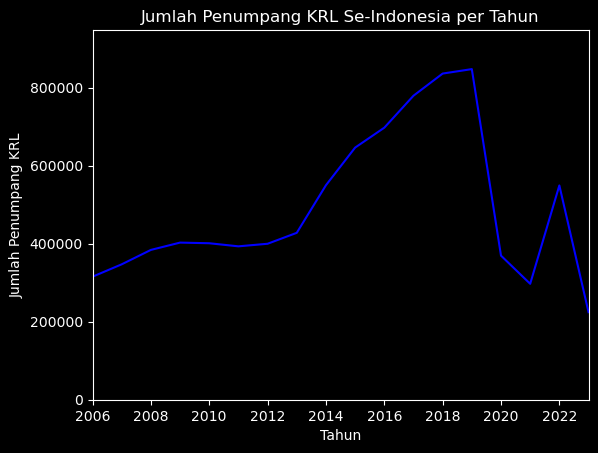

In [35]:
# Let's make visualization of KLR passengers over time
plt.plot(df_2_new['Tahun'], df_2_new['Jumlah'], color='blue')
plt.style.use('dark_background')
plt.title('Jumlah Penumpang KRL Se-Indonesia per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang KRL')
plt.ylim(0, np.max(df_2_new['Jumlah']+100000))
plt.xlim(2006,2023)
plt.show()

3. Inflation Data in Indonesia Per Month

In [36]:
#let's take a look at our data again
df_3

,No,Tahun,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15
...,...,...,...
240,241,2023-01-01,5.28
241,242,2023-02-01,5.47
242,243,2023-03-01,4.97
243,244,2023-04-01,4.33


Because it's inflation data, let's we use average per year instead of sum!

In [37]:
# Converting the 'Tahun' column to datetime
df_3['Tahun'] = pd.to_datetime(df_3['Tahun'])

# Creating a new data frame to preserve the original data
df_3_new = df_3.copy()
df_3_new


,No,Tahun,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15
...,...,...,...
240,241,2023-01-01,5.28
241,242,2023-02-01,5.47
242,243,2023-03-01,4.97
243,244,2023-04-01,4.33


In [38]:
# Grouping the data by year and calculating the mean of 'Data Inflasi (dalam persen)'
df_3_new = df_3_new.groupby(df_3['Tahun'].dt.year).mean('Data Inflasi (dalam persen)').reset_index()
# Dropping the 'No' column as it is not needed
df_3_new.drop(columns=['No'], inplace=True)

# Displaying the fresh data
df_3_new


,Tahun,Data Inflasi (dalam persen)
0,2003,6.790000
1,2004,6.057500
2,2005,10.402500
3,2006,13.331667
4,2007,6.404167
5,2008,10.308333
6,2009,4.895000
7,2010,5.125000
8,2011,5.380000
9,2012,4.278333


Let's take a look at our statistical summary!

In [39]:
df_3_new.describe()

,Tahun,Data Inflasi (dalam persen)
count,21.000000,21.000000
mean,2013.000000,5.650992
std,6.204837,2.878294
min,2003.000000,1.560000
25%,2008.000000,3.809167
50%,2013.000000,5.125000
75%,2018.000000,6.419167
max,2023.000000,13.331667


From the data above, it can be seen that the average annual inflation rate reaches a maximum of around 13% and a minimum of approximately 1.56%, with an overall average of about 5.6%. Now, let's examine the inflation trend from year to year.

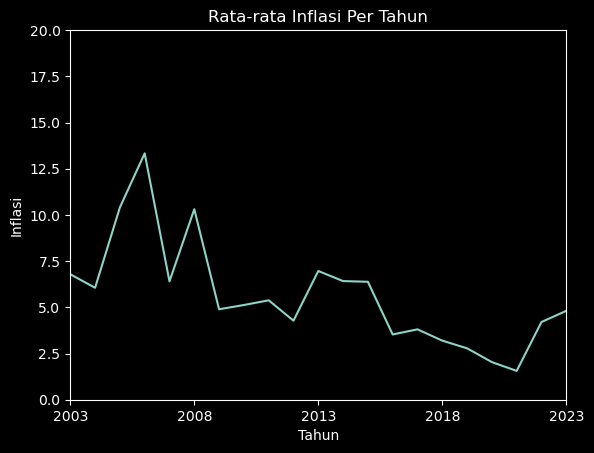

In [40]:
# make visualization for average inflation per year
plt.plot(df_3_new['Tahun'], df_3_new['Data Inflasi (dalam persen)'])
plt.style.use('dark_background')
plt.xlim(2003, 2023)
plt.xlabel('Tahun')
plt.ylabel('Inflasi')
plt.title('Rata-rata Inflasi Per Tahun')
plt.xticks([i for i in range(2003, 2028, 5)])
plt.ylim(0,20)
plt.show()

From the data above, the inflation trend shows a decrease from 2003 to 2023, with the highest inflation rate being around 13% and the lowest around 1.5%.

# **Correlation Test**
In this discussion, we will use the combined data from the three datasets to examine the relationship between variables in the data. We will perform correlation tests using Pearson correlation and Spearman correlation.

The key difference between Pearson correlation and Spearman correlation is that Pearson correlation measures the **linear correlation** between two variables, while Spearman correlation does not necessarily require linearity.



In [41]:
# Merging df_1_baru and df_2_baru based on 'Tahun' column
merged_df = pd.merge(df_1_new, df_2_new, on='Tahun', how='inner')

# Merging merged_df and df_3_baru based on 'Tahun' column
final_df = pd.merge(merged_df, df_3_new, on='Tahun', how='inner')

final_df


,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran,Jumlah,Longitude,Latitude,Data Inflasi (dalam persen)
0,2011,21946219,1706127,393378,5155.0236,-264.4344,5.380000
1,2012,22656685,1510270,399974,5155.0236,-264.4344,4.278333
2,2013,22869068,1465183,428025,5155.0236,-264.4344,6.965833
3,2014,23279795,1439198,550112,5155.0236,-264.4344,6.419167
4,2015,23566602,1501559,646566,5155.0236,-264.4344,6.382500
5,2016,23905967,1405595,697658,5155.0236,-264.4344,3.530833
6,2017,24556127,1404558,779630,5155.0236,-264.4344,3.809167
7,2018,25576173,1403685,836474,5155.0236,-264.4344,3.197500
8,2019,26044786,1400322,847884,5155.0236,-264.4344,2.781667
9,2020,26174705,1669324,369521,5155.0236,-264.4344,2.035833


In [42]:
# Renaming the 'Jumlah' column to 'Jumlah Penumpang KRL'
final_df.rename(columns={'Jumlah': 'Jumlah Penumpang KRL'}, inplace=True)

# Dropping the 'Longitude' and 'Latitude' columns
final_df.drop(columns=['Longitude', 'Latitude'], inplace=True)

# Displaying the updated data frame
final_df


,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran,Jumlah Penumpang KRL,Data Inflasi (dalam persen)
0,2011,21946219,1706127,393378,5.380000
1,2012,22656685,1510270,399974,4.278333
2,2013,22869068,1465183,428025,6.965833
3,2014,23279795,1439198,550112,6.419167
4,2015,23566602,1501559,646566,6.382500
5,2016,23905967,1405595,697658,3.530833
6,2017,24556127,1404558,779630,3.809167
7,2018,25576173,1403685,836474,3.197500
8,2019,26044786,1400322,847884,2.781667
9,2020,26174705,1669324,369521,2.035833


**1. Pearson Correlation Test**

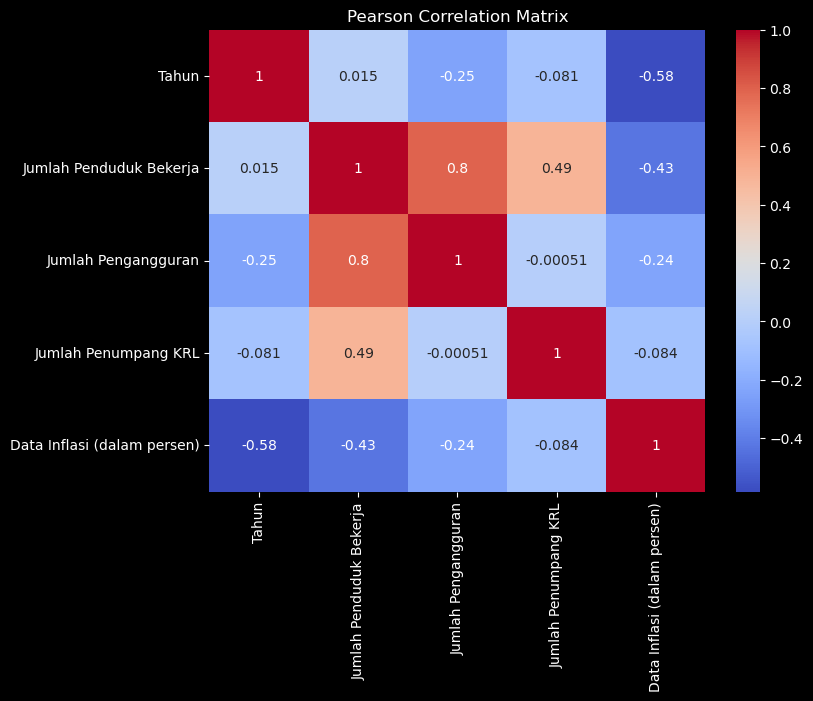

In [43]:
# Calculating the correlation matrix
corr_matrix = final_df.corr()

# Creating a heatmap matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.style.use('dark_background')
plt.show()


**Interpretation:** From the correlation matrix above, we can observe the correlation between the columns in the data, with values ranging between -1 and 1.
A positive value indicates a positive correlation between the two variables (both increase or decrease together), while a negative value indicates a negative correlation (they move in opposite directions, one increases while the other tends to decrease).

For example, the correlation between the number of employed population and the number of unemployed population is 0.8 (>0.7), indicating a strong positive correlation between the two variables.
On the other hand, the correlation between the average inflation rate and the number of KRL passengers is -0.084, indicating a weak negative correlation (below 0.7). It can be said that the increase in KRL passengers does not have a significant impact on reducing inflation (the relationship between the two variables is not causal).

However, to determine whether the observed correlations are statistically significant, we need to consider the p-value associated with each correlation.

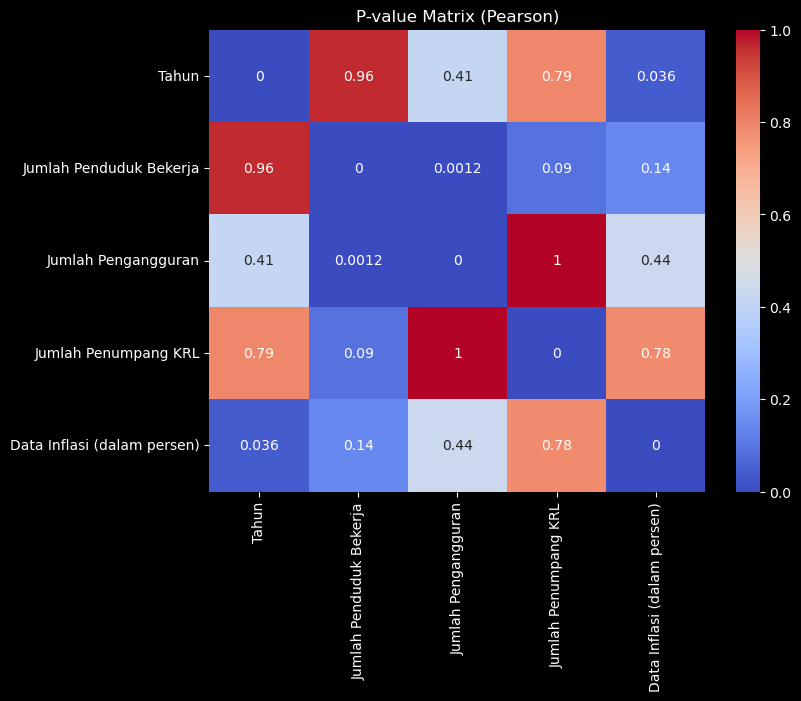

In [44]:
# Calculating the p-value matrix
p_value_matrix = final_df.apply(lambda x: final_df.apply(lambda y: stats.pearsonr(x, y)[1]))

# Creating a heatmap matrix with p-values
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('P-value Matrix (Pearson)')
plt.style.use('dark_background')
plt.show()


The p-value matrix determines the significance of the correlations, usually indicated by two hypothesis statements, H0 and H1.
H0: There is no significant correlation between the two variables.
H1: There is a significant correlation between the two variables.
A specific significance level (usually 0.05) is used as a threshold. If the p-value < 0.05, H0 is rejected in favor of H1, and vice versa.

Based on the explanation above, it can be observed that the number of KRL passengers and the number of unemployed population have a p-value = 1 (> 0.05), indicating that H0 is accepted, or in other words, they do not have a significant correlation.

**2. Spearman Correlation Test**
Certainly! We can use Spearman correlation as an additional measure to examine the correlation between two variables, considering that Pearson correlation primarily focuses on linear relationships.

Spearman correlation assesses the **rank-order correlation** between two variables, making it suitable for capturing non-linear associations between variables. By using both Pearson and Spearman correlation, we can obtain a more comprehensive understanding of the relationships in the data.

In [45]:
# Get the Spearman Correlation
final_df.corr(method='spearman')

,Tahun,Jumlah Penduduk Bekerja,Jumlah Pengangguran,Jumlah Penumpang KRL,Data Inflasi (dalam persen)
Tahun,1.000000,0.571429,-0.186813,-0.159341,-0.582418
Jumlah Penduduk Bekerja,0.571429,1.000000,0.241758,0.269231,-0.725275
Jumlah Pengangguran,-0.186813,0.241758,1.000000,-0.505495,-0.043956
Jumlah Penumpang KRL,-0.159341,0.269231,-0.505495,1.000000,-0.082418
Data Inflasi (dalam persen),-0.582418,-0.725275,-0.043956,-0.082418,1.000000


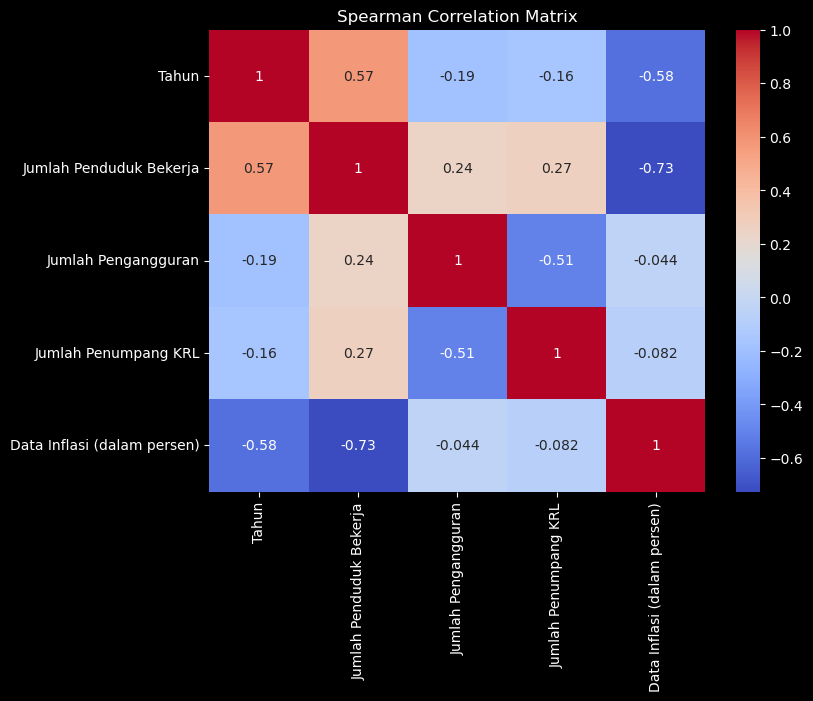

In [46]:
# Calculating the Spearman correlation matrix
corr_matrix_2 = final_df.corr(method='spearman')

# Creating a heatmap matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.style.use('dark_background')
plt.show()


From the matrix above, it can be seen that the correlation between the number of employed population and KRL passengers is 0.27, which is quite weak. This means that, in general, when the number of KRL passengers increases or decreases, it is not accompanied by a significant increase or decrease in the number of employed population, and vice versa.

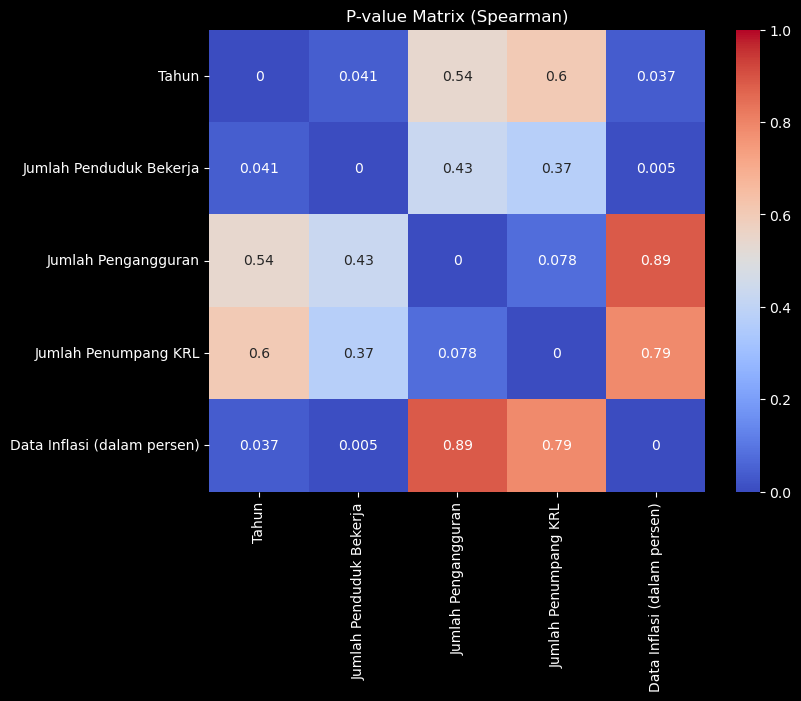

In [47]:
# Calculating the p-value matrix
p_value_matrix = final_df.apply(lambda x: final_df.apply(lambda y: stats.spearmanr(x, y)[1]))

# Creating a heatmap matrix with p-values
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('P-value Matrix (Spearman)')
plt.show()


The interpretation of the p-value for Spearman correlation remains the same as Pearson correlation. Taking the previous example of the number of employed population and KRL passengers, both of them have p-values > 0.05, indicating that H0 is accepted. In other words, the number of employed population and KRL passengers do not have a statistically significant correlation.

# **Significance Test**

Alright, in this statistical test, we're gonna check if there's a significant difference in the means between two groups of data. It might seem obvious to just look at the average of each column, but is the difference statistically meaningful? We can use two statistical tests for that: the t-test (to test the significance of the mean difference between two variables) and the ANOVA test (which is like the t-test but used when there are more than two variables).

For example, let's test the difference between the number of employed population and the number of unemployed population that we saw earlier. The difference is substantial, but is it statistically significant? Let's find out!

Oh, by the way, we won't include the inflation data because its scale is much smaller (in single and double digits), unlike the other three datasets that are in thousands or even hundreds of thousands.

In [48]:
# Selecting the relevant columns from final_df
data = final_df[['Jumlah Penduduk Bekerja', 'Jumlah Pengangguran', 'Jumlah Penumpang KRL']]

# Performing T-Test between Jumlah Penduduk Bekerja and Jumlah Pengangguran
t_stat, p_value = ttest_ind(data['Jumlah Penduduk Bekerja'], data['Jumlah Pengangguran'])
print("T-Test_1:")
print("T-Statistic_1:", t_stat)
print("P-Value_1:", p_value)

# Performing T-Test between Jumlah Penduduk Bekerja and Jumlah Penumpang KRL
t_stat_2, p_value_2 = ttest_ind(data['Jumlah Penduduk Bekerja'], data['Jumlah Penumpang KRL'])
print("T-Test_2:")
print("T-Statistic_2:", t_stat_2)
print("P-Value_2:", p_value_2)

# Performing T-Test between Jumlah Pengangguran and Jumlah Penumpang KRL
t_stat_3, p_value_3 = ttest_ind(data['Jumlah Pengangguran'], data['Jumlah Penumpang KRL'])
print("T-Test_3:")
print("T-Statistic_3:", t_stat_3)
print("P-Value_3:", p_value_3)

# Performing ANOVA
f_stat, p_value = f_oneway(data['Jumlah Penduduk Bekerja'], data['Jumlah Pengangguran'], data['Jumlah Penumpang KRL'])
print("\nANOVA:")
print("F-Statistic:", f_stat)
print("P-Value:", p_value)


T-Test_1:
T-Statistic_1: 23.75333953109049
P-Value_1: 3.497010821292531e-18
T-Test_2:
T-Statistic_2: 24.77120353372976
P-Value_2: 1.3269204791596943e-18
T-Test_3:
T-Statistic_3: 10.532093508373162
P-Value_3: 1.7689753127339811e-10

ANOVA:
F-Statistic: 586.7518196875426
P-Value: 3.3613658467290982e-28


**Interpretation:**
It's actually quite obvious when looking at the data. The results of the T-test, with its extremely small p-values, indicate a significant difference in the average values between the number of employed population and the number of unemployed population, as well as between the number of employed population and the number of KRL passengers, and between the number of unemployed population and the number of KRL passengers.

As for the ANOVA test, once again, the extremely small p-value indicates a highly significant difference in the average values among the combinations of the three datasets. However, we can't determine which specific combination(s) show significant differences.

# **Conclusion**
1. Overall, there is an increase in the number of KRL passengers, the number of employed/unemployed population, while there is a decrease in the average inflation rate over the years.
2. Generally, there is no significant correlation among the columns in the data.
3. Generally, there are significant differences in the means between two sets of data.

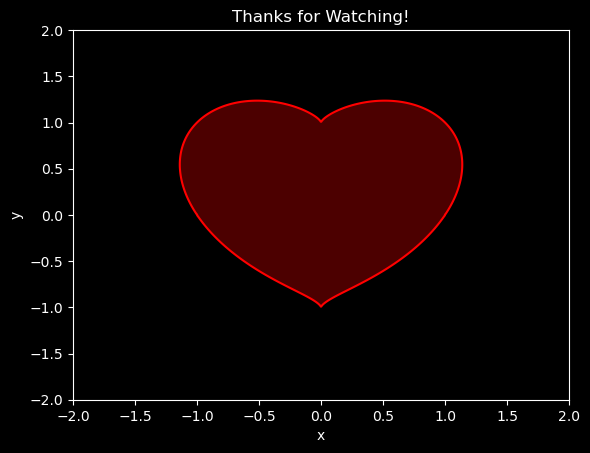

In [49]:
# Creating x and y coordinate data
x = np.linspace(-2, 2, 800)
y = np.linspace(-2, 2, 800)
x, y = np.meshgrid(x, y)

# Defining the implicit function
f = (x**2 + y**2 - 1)**3 - x**2 * y**3

# Creating the plot
plt.contour(x, y, f, [0], colors='red')  # Contour lines where f(x, y) = 0
plt.contourf(x, y, f, levels=[-np.inf, 0], colors='red', alpha=0.3)  # Filling the area below the contour line with red color
plt.style.use('dark_background')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Thanks for Watching!')
plt.grid(False)
plt.show()
